# Упражнение 1. Альтернативная реализация сортировки подсчетом

Изучите алгоритм сортировки подсчетом, представленный в разделе "устойчивый алгоритм" в [статье](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BF%D0%BE%D0%B4%D1%81%D1%87%D1%91%D1%82%D0%BE%D0%BC) из википедии. Реализуйте его на Python.

In [2]:
import random
k = 5
N = 200
A_list = [random.randint(0, k - 1) for i in range(N)]
B_list = [0 for i in range(N)]
C_list = [0 for i in range(k)]

for i in range(N):
    C_list[A_list[i]] +=1

for i in range(1, k):
    C_list[i] += C_list[i - 1]
    
for i in range(N-1, -1, -1):
    C_list[A_list[i]] -= 1
    B_list[C_list[A_list[i]]] = A_list[i]

# Упражнение 2. Сортировка подсчетом без буфера

Модифицируйте алгоритм из упражнения 1 так, чтобы сортировка производилась без использования вспомогательного буфера для отсортированного массива.

In [3]:
A_list = [random.randint(0, k - 1) for i in range(N)]
B_list = A_list
C_list = [0 for i in range(k)]

for i in range(N):
    C_list[A_list[i]] +=1
    
for i in range(1, k):
    C_list[i] += C_list[i - 1]

A_list[:C_list[0]] = [0 for i in range(C_list[0])]
for i in range(1, k):
    for j in range(C_list[i - 1], C_list[i]):
         A_list[j] = i


# Упражнение 3. Блочная сортировка для произвольного распределения 

Пусть элементы сортируемого массива $A$ распределены с плотностью вероятности $\rho(x)$. Как можно разбить область значений элементов массива на корзины для блочной сортировки? Реализуйте Ваш метод разбиения в виде функции `partition()`, которая будет принимать на вход три аргумента:

1. `N` - число блоков;

2. `bounds` - кортеж из двух элементов, содержащий левую и правую границы области значений элементов массива;

3. `rho` - функция вычисляющая плотность вероятности того, что элемент массива  принимает некоторое значение (функцция принимает одно вещественное число и возвращает одно вещественное число).

> Утверждение, что элементы распределены с плотностью вероятности $\rho(x)$, значит, что вероятность обнаружить элемент массива $e$ на отрезке $[x,~x + \Delta x]$  равна
$$P(e \in [x,~x + \Delta x]) = \int\limits_x^{x + \Delta x} \rho(x) dx$$
Считайте, что $\rho(x)$ не равна нулю только на отрезке `[bounds[0], bounds[1]]`

In [5]:
import matplotlib.pyplot as plt

[0.0,
 4.499549999998909e-08,
 1.3497749999997755e-07,
 2.6993699999995343e-07,
 4.4986499999997153e-07,
 6.747524999999754e-07,
 9.445904999999754e-07,
 1.2593699999999818e-06,
 1.6190819999999827e-06,
 2.0237174999999663e-06,
 2.4732674999999428e-06,
 2.9677229999999445e-06,
 3.5070749999999596e-06,
 4.091314499999954e-06,
 4.7204324999999605e-06,
 5.394419999999944e-06,
 6.1132679999999385e-06,
 6.876967499999953e-06,
 7.685509499999955e-06,
 8.538884999999952e-06,
 9.437084999999956e-06,
 1.0380100499999956e-05,
 1.1367922499999939e-05,
 1.2400541999999914e-05,
 1.347794999999994e-05,
 1.4600137499999955e-05,
 1.576709549999995e-05,
 1.6978814999999958e-05,
 1.8235286999999945e-05,
 1.953650249999994e-05,
 2.0882452499999914e-05,
 2.2273127999999917e-05,
 2.370851999999992e-05,
 2.5188619499999927e-05,
 2.671341749999993e-05,
 2.828290499999992e-05,
 2.98970729999999e-05,
 3.155591249999991e-05,
 3.325941449999991e-05,
 3.500756999999992e-05,
 3.680036999999991e-05,
 3.863780549999

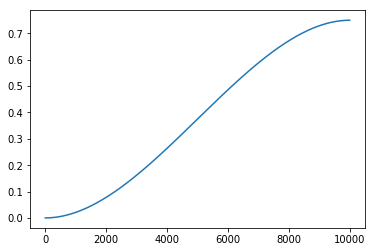

In [7]:
def rho(x):
    return (9 - x**2)/80000

def partition(N, bounds, rho, split_factor = 10000):
    diap = (bounds[1] - bounds[0])
    dist = [0 for i in range(split_factor)]
    dist[0] = rho(bounds[0])
    for i in range(1, split_factor):
        dist[i] = rho(bounds[0] + diap*i/split_factor) + dist[i - 1]
    
    N_bounds = [0 for i in range(N + 1)]
    N_bounds[0] = bounds[0]
    N_bounds[-1] = bounds[1]
#     (dist[split_factor - 1] - dist[0])/N
    
    
        
    return dist
rho_list = partition(10, (-3, 3), rho)
plt.plot(rho_list)
# rho_list

# Упражнение 4. Определение оптимального количества блоков (упражнение 3 из alg3)

Отсортируйте с помощью блочной сортировки список `L`. Определите оптимальное значение числа блоков для сортировки списка из $10^4$ элементов.

In [ ]:
import timeit
import random
L = [random.uniform(0, 1) for _ in range(10**4)]